Modified from Parul Pandey's `Face Detection with Python using OpenCV`<br>
Link of this Original Tutorial: https://levelup.gitconnected.com/face-detection-with-python-using-opencv-5c27e521c19a

# Loading the necessary libraries

In [1]:
# Import the necessary libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob

# Loading images


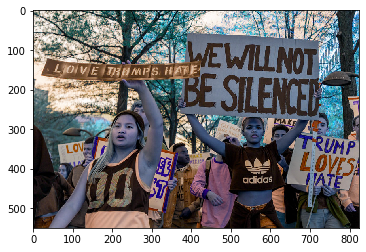

In [2]:
#  Loading the image to be tested
test_image = cv2.imread('test.jpg')

plt.imshow(test_image)


In [3]:
#Opencv Uses BGR color instead of RGB so we have to transform the image to RGB for it to show the true color

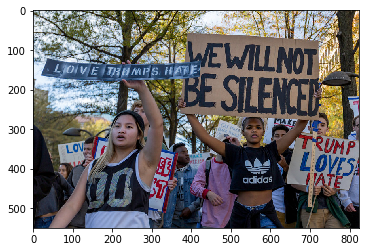

In [4]:
test_RGB=cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_RGB)

In [5]:
#We can write a small function here for this tranformation to be used later 

In [6]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Haar cascade files

OpenCV comes with a lot of pre-trained classsifiers. For instance there are classifiers for smile, eyes,face etc. These come in the form of xml files and are located in `opencv/data/haarcascades/` folder. 

OpenCV: https://github.com/opencv/opencv/tree/master/data/haarcascades

You can check the OpenCV Haar Cascades Documentation and tutorial here: <br>https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html
https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html

### Loading the classifier for frontal face

In [7]:
haar_cascade_face = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# Face detection
We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h)

In [8]:
faces_rects = haar_cascade_face.detectMultiScale(test_image, scaleFactor = 1.2, minNeighbors = 2);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  4


Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV. We will be drawing a pink rectangle with thicknessof 2

In [9]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (190, 105, 220), 2)
        

Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

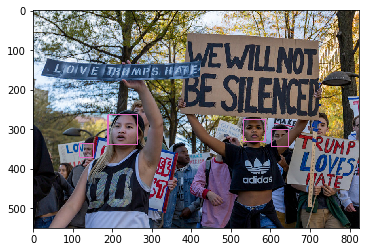

In [10]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

Now that we have identified the faces, we can the move on to blur the areas we have found

In [11]:
image_copy = test_image.copy()

for (x, y, w, h) in faces_rects:
    cv2.rectangle(image_copy, (x, y), (x+w, y+h), 2)
        # select the areas where the face was found
    roi_color = image_copy[y:y+h, x:x+w]
        # blur the colored image
    blur = cv2.GaussianBlur(roi_color, (101,101), 0)        
        # Insert ROI back into image
    image_copy[y:y+h, x:x+w] = blur            

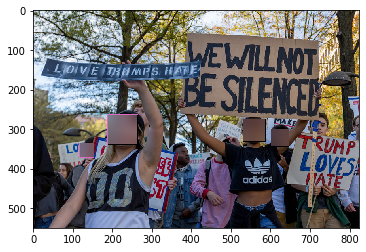

In [12]:
plt.imshow(convertToRGB(image_copy))

# Turning this into a Function

In [17]:
def detect_faces(cascade, test_image, scaleFactor = 1.2):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(image_copy, scaleFactor=scaleFactor, minNeighbors=2)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), 5)
        # select the areas where the face was found
        roi_color = image_copy[y:y+h, x:x+w]
        # blur the colored image
        blur = cv2.GaussianBlur(roi_color, (101,101), 0)        
        # Insert ROI back into image
        image_copy[y:y+h, x:x+w] = blur            
        
    return image_copy

### Test our function

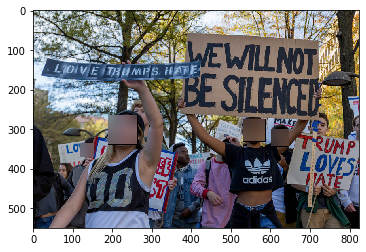

In [18]:
#loading image
test_image2 = cv2.imread('test.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

## Let's try to make it so it can edit multiple image at once

In [19]:
img_dir = "testimages" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

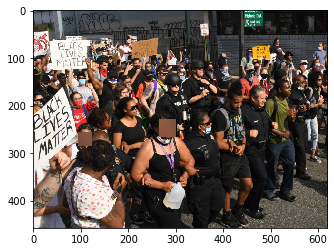

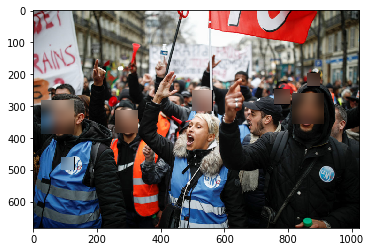

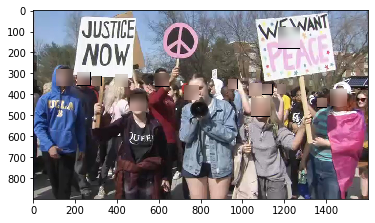

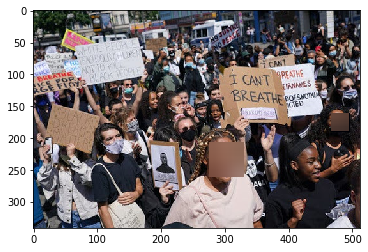

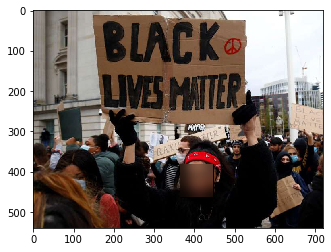

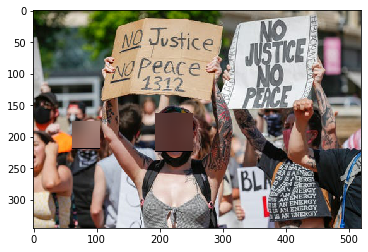

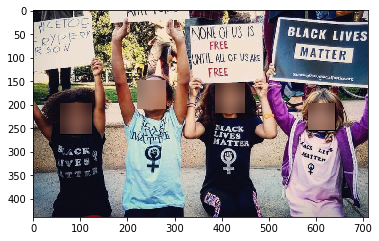

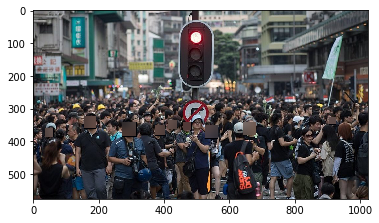

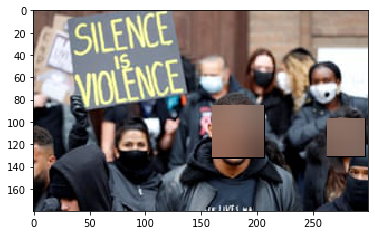

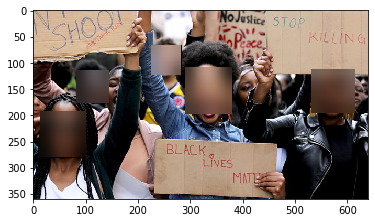

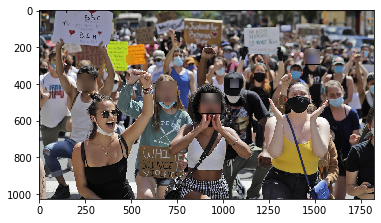

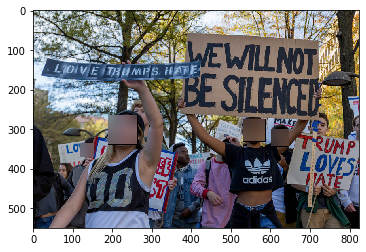

In [20]:
for x in range(len(data)):
    pics = detect_faces(haar_cascade_face, data[x])
    plt.figure()
    plt.imshow(convertToRGB(pics))

## We should also save those files 

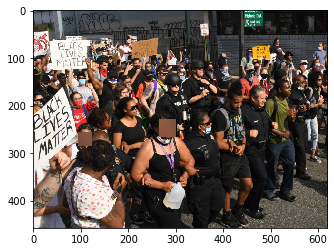

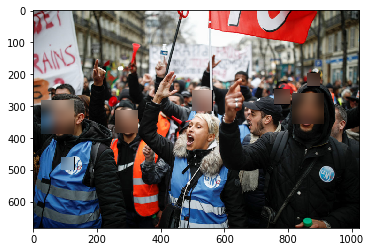

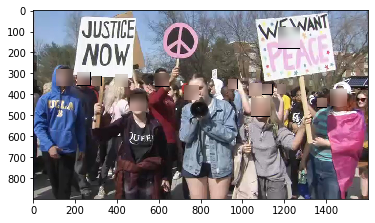

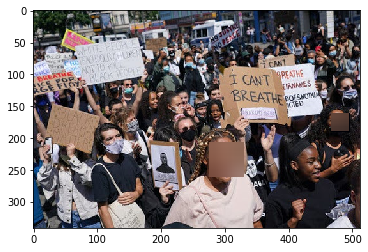

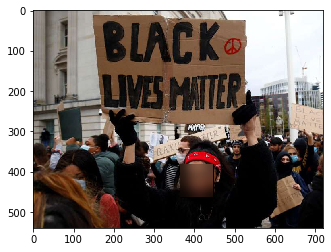

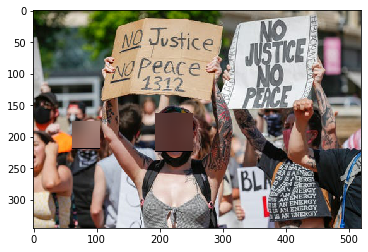

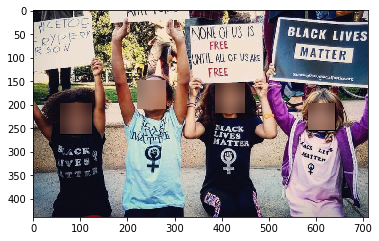

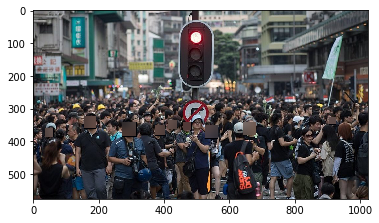

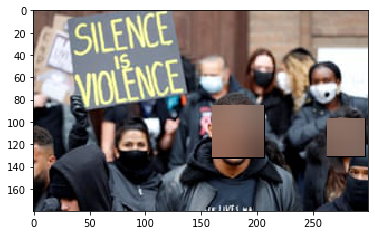

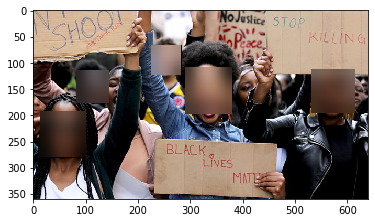

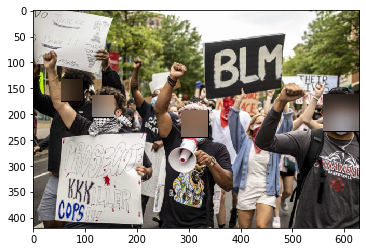

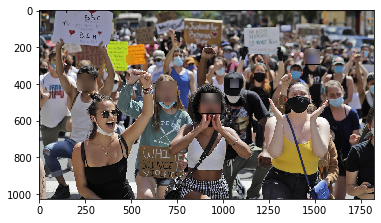

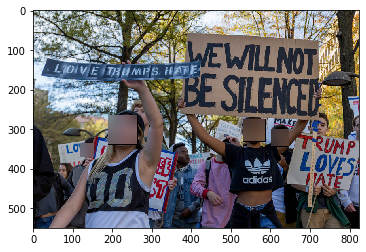

In [21]:
for x in range(len(data)):
    d=x
    pics = detect_faces(haar_cascade_face, data[x])
    plt.figure()
    plt.imshow(convertToRGB(pics))
    filename = "output/file_%d.jpg"%d
    cv2.imwrite(filename, pics)
    d+=1